In [1]:
import numpy as np
import pandas as pd

import scipy.linalg as la
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity

import matplotlib.pyplot as plt

##### Exercise 3.1.5

In [2]:
def pbinom(x,n,p):
    y = binom.pmf(x,n,p)
    return y.cumsum()[-1]

In [3]:
x = [i for i in range(0,20)]
n = 50
p = 0.2
# y = binom.pmf(x,n,p)
y = pbinom(x,n,p)

In [4]:
# 1-y.cumsum()[-1]
1-y

0.0009324364894234272

##### Exercise 3.1.6

In [5]:
x=[(0.75**i) for i in range(1,6)]
print(x)

[0.75, 0.5625, 0.421875, 0.31640625, 0.2373046875]


Answer is 5

##### Exercise 3.1.8

In [6]:
n = 15
p = 0.2
x = [k for k in range(0,(n+1))]
y = binom.pmf(x,n,p)

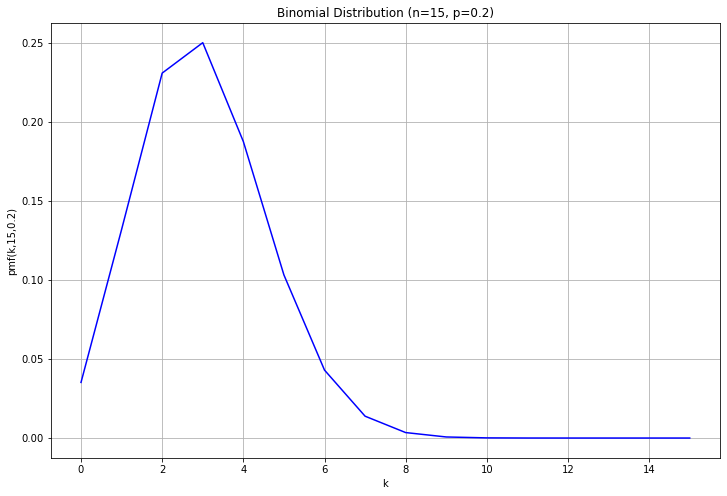

In [7]:
plt.figure(figsize = (12,8))
plt.plot(x, y, color='blue')
plt.grid()
plt.xlabel('k')
plt.ylabel('pmf(k,15,0.2)')
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

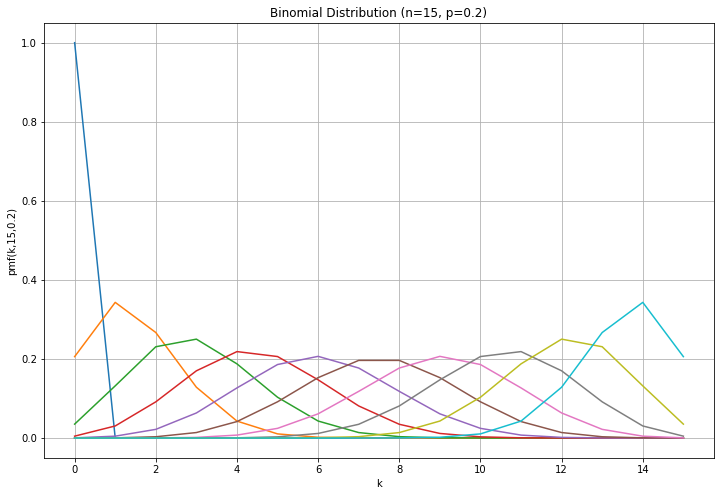

In [8]:
xp = [i/10 for i in range(10)]

plt.figure(figsize = (12,8))

for pi in xp:
    y = binom.pmf(x,n,pi)
    plt.plot(x, y)
plt.grid()
plt.xlabel('k')
plt.ylabel('pmf(k,15,0.2)')
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

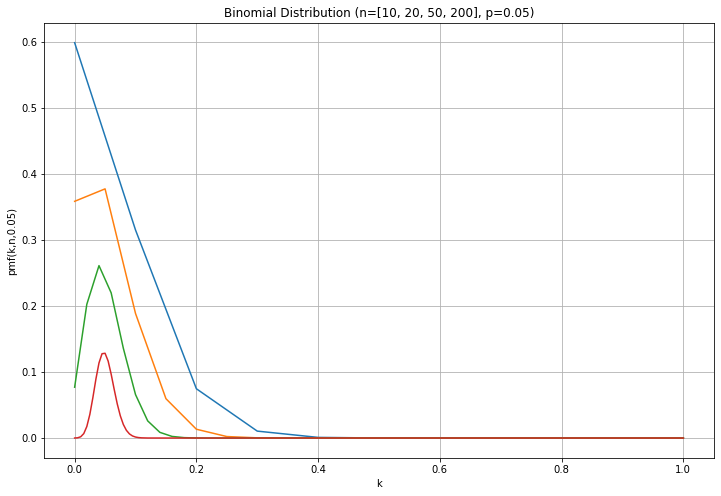

In [9]:
p = 0.05
plt.figure(figsize = (12,8))
for n in [10,20,50,200]:
    x = [k for k in range(0,(n+1))]
    y = binom.pmf(x,n,p)
    x_plot = [k/n for k in range(0,(n+1))]
    plt.plot(x_plot, y)
plt.grid()
plt.xlabel('k')
plt.ylabel('pmf(k,n,0.05)')
plt.title(f"Binomial Distribution (n={[10,20,50,200]}, p={p})")
plt.show()

##### Exercise 3.2.1

In [10]:
# poisson.cdf(k=4, mu=2)

poisson.pmf(k=4, mu=2)

0.09022352215774178

In [11]:
# # generate Poisson distribution with sample size 10000
# x = poisson.rvs(mu=2, size=10000)

# # create plot of Poisson distribution
# plt.figure(figsize = (12,8))
# plt.hist(x,bins = 10, density=True, edgecolor='black')
# plt.grid()


##### Exercise 3.2.2

In [12]:
prob = 0
for i in range(1,8):
    prob = prob + poisson.pmf(k=i, mu=4)
print('Probability that X is in the range {0} and {8} is', prob)

Probability that X is in the range {0} and {8} is 0.9305507453184182


##### Exercise 3.2.5

In [13]:
prob = 0
for i in range(76,124):
    prob = prob + poisson.pmf(k=i, mu=100)
print('Probability that X is in the range {76} and {124} is', prob)

Probability that X is in the range {76} and {124} is 0.9832837995787725


##### Exercise 3.2.6

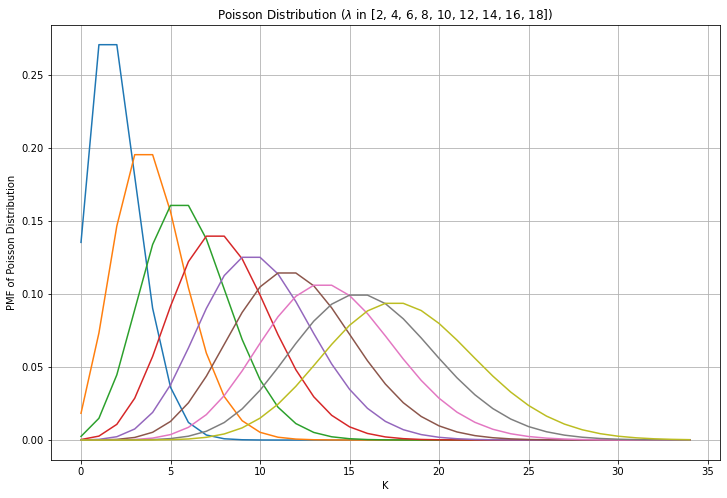

In [14]:
x = [i for i in range(35)]
lmda = [mu for mu in range(2,20,2)]

plt.figure(figsize = (12,8))

for l in lmda:
    y = poisson.pmf(k=x, mu=l)
    plt.plot(x, y)
plt.grid()
plt.xlabel('K')
plt.ylabel('PMF of Poisson Distribution')
plt.title(f"Poisson Distribution ($\lambda$ in {lmda})")
plt.show()



##### Exercise 3.2.8

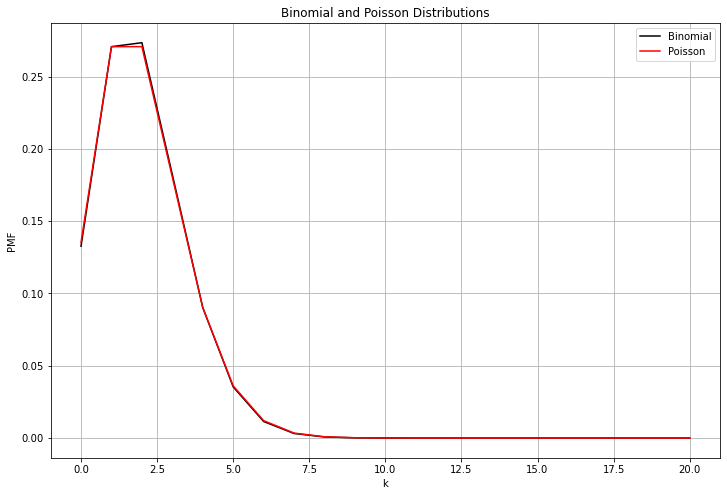

In [15]:
n = 100
p = 0.02
lmda = int(n*p)
x = [k for k in range(0,(n//5+1))]

yb = binom.pmf(x,n,p)
yp = poisson.pmf(k=x, mu=lmda)

plt.figure(figsize = (12,8))
plt.plot(x, yb, color='black')
plt.plot(x, yp, color='red')
plt.grid()
plt.legend(['Binomial','Poisson'])
plt.xlabel('k')
plt.ylabel('PMF')
plt.title(f"Binomial and Poisson Distributions")
plt.show()

##### Exercise 3.2.9

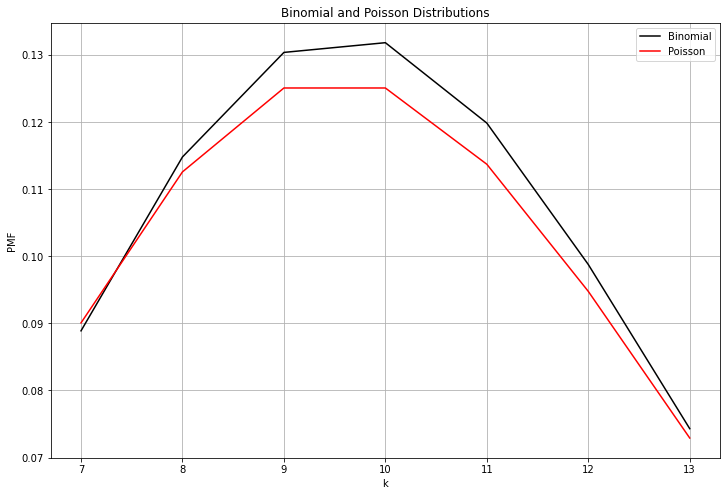

In [16]:
n = 100

p = 0.1 # p = 0.02, 0.1, 0.3, 0.5

lmda = int(n*p)
sgma = int(np.sqrt(n*p*(1-p)))
low = lmda-sgma
high = lmda+sgma+1
x = [k for k in range(low,high)]

yb = binom.pmf(x,n,p)
yp = poisson.pmf(k=x, mu=lmda)

plt.figure(figsize = (12,8))
plt.plot(x, yb, color='black')
plt.plot(x, yp, color='red')
plt.grid()
plt.legend(['Binomial','Poisson'])
plt.xlabel('k')
plt.ylabel('PMF')
plt.title(f"Binomial and Poisson Distributions")
plt.show()

In [17]:
print('Approximation works well for p = {0.02} and p = {0.1}')

Approximation works well for p = {0.02} and p = {0.1}


##### Exercise 3.2.10

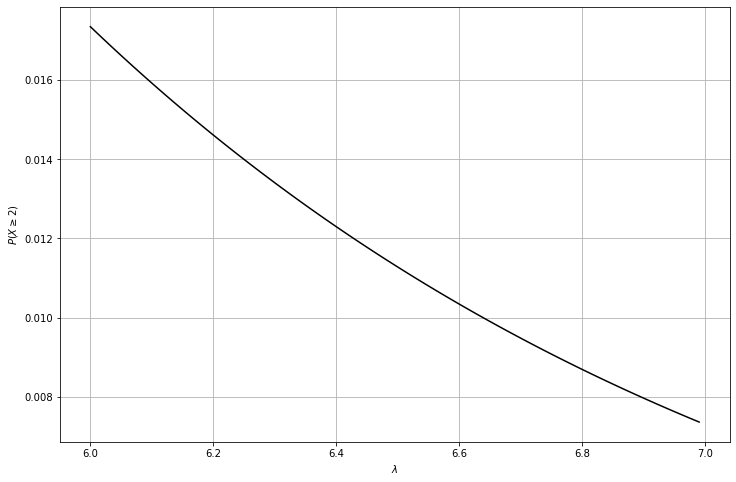

In [18]:
n = 100
m=6
lmda = [i/n for i in range(n*m,n*(m+1))]
y = [np.exp(-1*k)*(1+k) for k in lmda]

plt.figure(figsize = (12,8))
plt.plot(lmda, y, color='black')
plt.grid()
plt.xlabel('$\lambda$')
plt.ylabel('$P(X \geq 2)$')
plt.show()

##### Exercise 3.2.13

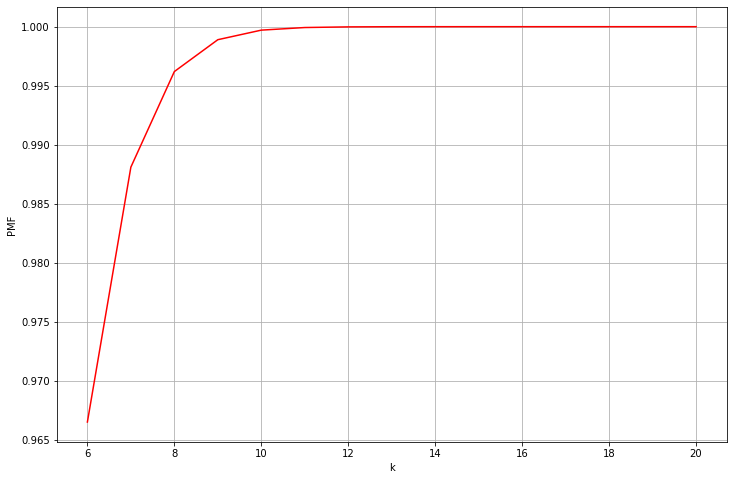

In [19]:
n = 100
lmda = 3
x = [k for k in range(6,n//5+1)]

yp = poisson.cdf(k=x, mu=lmda)

plt.figure(figsize = (12,8))
plt.plot(x, yp, color='red')
plt.grid()
plt.xlabel('k')
plt.ylabel('PMF')
plt.show()

##### Exercise 3.3.1

In [20]:
a = 6.0
b = 2.0
gamma.cdf(5.23, a, loc=0, scale=b)

0.05014788369675771

In [21]:
s = 4*np.sqrt(6)
l = 12-s
u = 12+s
Px = gamma.cdf(u, a, loc=0, scale=b) - gamma.cdf(l, a, loc=0, scale=b)
Px

0.959179982079514

## $f(x, \alpha, \beta) = \frac{\beta^\alpha x^{\alpha - 1} e^{-\beta x }}{\Gamma(\alpha)}$

##### Exercise 3.3.2

In [22]:
a = 2.5
b = 2.0
gamma.cdf(0.832, a, loc=0, scale=b)

0.025052459404389105

In [23]:
gamma.cdf(12.84, a, loc=0, scale=b)

0.9750748230738602

##### Exercise 3.3.3

In [24]:
a = 5
b = 2.0
gamma.cdf(9.4, a, loc=0, scale=b)

0.5053912139152091

In [25]:
pf = 1 - gamma.cdf(15, a, loc=0, scale=b)
ps = gamma.cdf(15, a, loc=0, scale=b)
Px = ps**8 * (ps**2 + 10*ps*pf + 45 * pf**2)
Py = 1 - Px
Py

0.13553217437511178

##### Exercise 3.3.7

In [26]:
a = 2.0
b = 2.0
gamma.cdf(9.49, a, loc=0, scale=b)

0.9500468687767051

##### Exercise 3.3.11

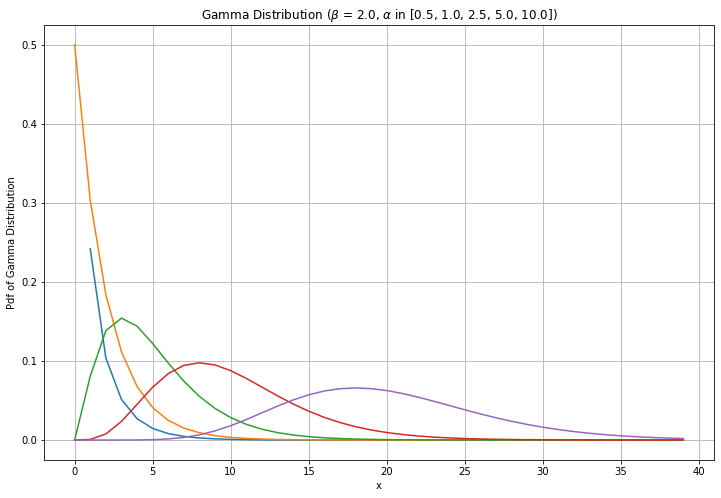

In [27]:
freedom = [1,2,5,10,20]
rr = [float(n)/2 for n in freedom]
b = 2.0
x = [i for i in range(40)]
plt.figure(figsize = (12,8))
for r in freedom:
    y = gamma.pdf(x, r/2, loc=0, scale=b)
    plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('Pdf of Gamma Distribution')
plt.title(f"Gamma Distribution ($ \\beta $ = {b}, $ \\alpha $ in {rr})")
plt.show()

##### Exercise 3.3.12

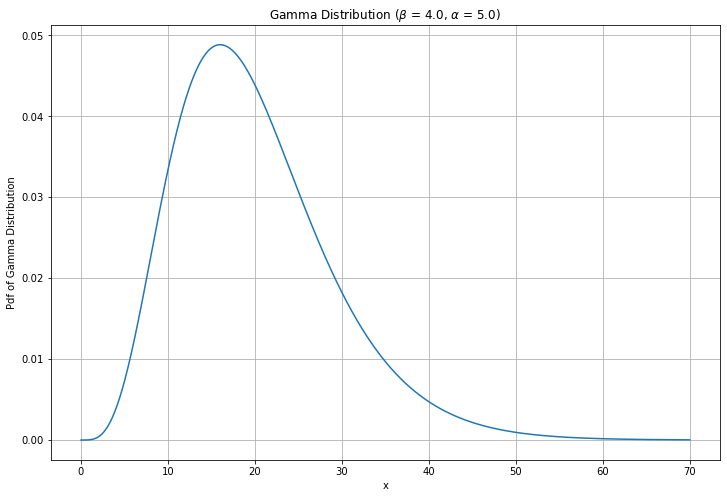

In [28]:
a = 5.0
b = 4.0
x = [i/100 for i in range(7000)]
plt.figure(figsize = (12,8))

y = gamma.pdf(x, a, loc=0, scale=b)

plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('Pdf of Gamma Distribution')
plt.title(f"Gamma Distribution ($ \\beta $ = {b}, $ \\alpha $ = {a})")
plt.show()

In [29]:
print(f"Median of the gamma distribution is {gamma.median(a, loc=0, scale=b)}")

Median of the gamma distribution is 18.68363553118394


##### Exercise 3.3.13

$f(x, a, b) = \frac{\Gamma(a+b) x^{a-1} (1-x)^{b-1}}{\Gamma(a) \Gamma(b)}$

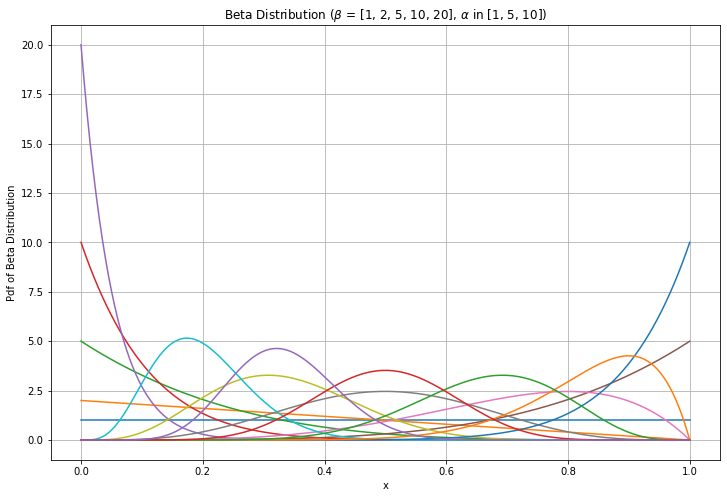

In [30]:
al = [1,5,10]
bl = [1,2,5,10,20]
n = 1000
x = [i/n for i in range(n+1)]
plt.figure(figsize = (12,8))
for a in al:
    for b in bl:
        y = beta.pdf(x, a, b, loc=0, scale=1)
        plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('Pdf of Beta Distribution')
plt.title(f"Beta Distribution ($ \\beta $ = {bl}, $ \\alpha $ in {al})")
plt.show()

##### Exercise 3.3.14

In [31]:
1-poisson.cdf(k=9, mu=6)

0.08392401699487584

In [32]:
a = 10
b = 10
1-gamma.cdf(120, a, loc=0, scale=b)

0.24239216167051247

## $f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}$

##### Exercise 3.4.2

In [33]:
# norm?

In [34]:
mu = 75
sgma = 10
x = [i/10 for i in range(1660)]
ynorm = norm.cdf(x, loc=mu, scale=sgma)

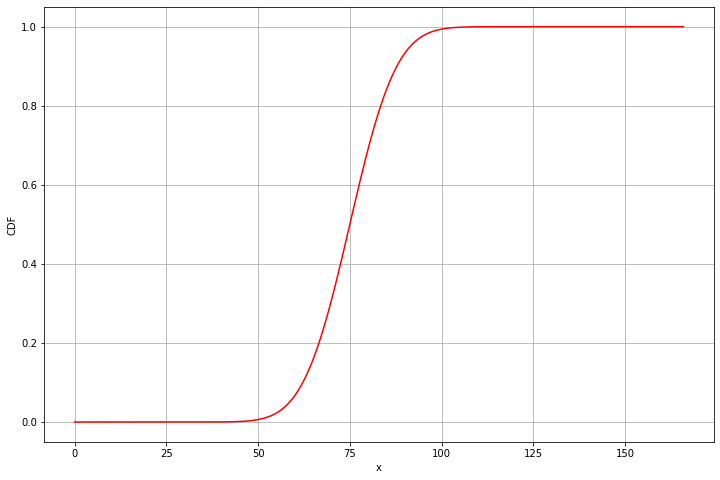

In [35]:
plt.figure(figsize = (12,8))
plt.plot(x, ynorm, color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('CDF')
plt.show()

In [36]:
print(norm.cdf(60, loc=mu, scale=sgma))
print((norm.cdf(100, loc=mu, scale=sgma) - norm.cdf(70, loc=mu, scale=sgma)))

0.06680720126885807
0.685252795948237


##### Exercise 3.4.3

In [37]:
def dx(a,t):
    return ((norm.cdf(a, loc=0, scale=1) - norm.cdf(-1*a, loc=0, scale=1))-t)

In [38]:
a = 2.0
b = 1.0
c = (a+b)/2
t = 0.9

err = []
cnt = 0
tol = 0.00001

while(abs(dx(c,t)) > tol):
    c = (a+b)/2
    cnt = cnt+1
    if(dx(c,t) > 0):
        a = c
    else:
        b = c
    err.append(c)

In [39]:
x = [i for i in range(1,cnt+1)]

In [40]:
(norm.cdf(c, loc=0, scale=1) - norm.cdf(-1*c, loc=0, scale=1))

0.9000090413664878

In [41]:
def my_plot(x,y,title,xl,yl,clr):
    plt.figure(figsize = (12,8))
    plt.plot(x, y, color=clr)
    plt.grid()
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title)
    plt.show()

1.6448974609375


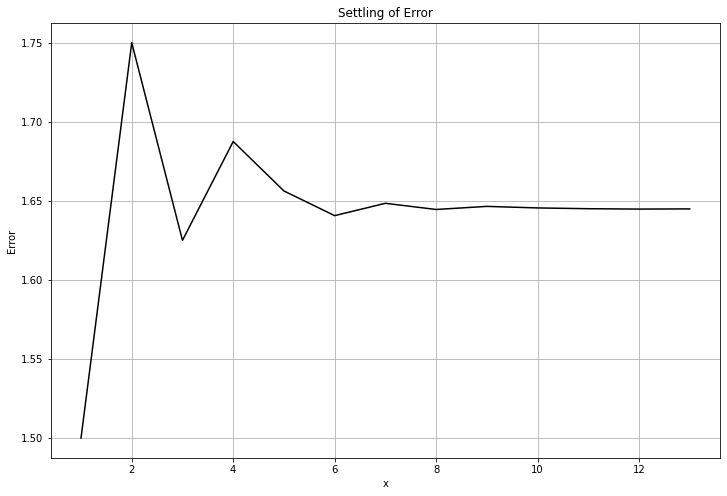

In [42]:
print(c)
my_plot(x,err,'Settling of Error','x','Error','black')

##### Exercise 3.4.4

In [43]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)

In [44]:
def invert_erfc(t):
    a = 3.0
    b = 0.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [45]:
y1 = invert_erfc(0.9)
y2 = invert_erfc(0.95)
x1 = 89.0
x2 = 94.0
sgma = (x1-x2)/(y1-y2)
mu = x1 - sgma*y1

In [46]:
print(sgma**2,mu)

189.4323043126373 71.36139112903226


##### Exercise 3.4.8

In [47]:
np.sqrt((np.pi/2)) * (norm.cdf(0, loc=0, scale=1)-norm.cdf(-2, loc=0, scale=1))

0.5981440066613041

##### Exercise 3.4.9

In [48]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)

In [49]:
def invert_erfc(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [50]:
y = invert_erfc(0.9)

In [51]:
print(y, norm.cdf(y, loc=0, scale=1))

1.281585693359375 0.900005989243589


In [52]:
mu = 65
sgma = 5
x = mu+sgma*y
print(x)

71.40792846679688


##### Exercise 3.4.10

In [53]:
norm.cdf(9, loc=3, scale=4) - norm.cdf(-1, loc=3, scale=4)

0.7745375447996848

##### Exercise 3.4.11

In [54]:
print(np.sqrt(2/np.pi),(1-2/np.pi))

0.7978845608028654 0.3633802276324186


##### Exercise 3.4.12

In [55]:
a = np.sqrt(0.04/10)
b = np.sqrt(38.4/10)
ans = 2*(norm.cdf(b, loc=0, scale=1) - norm.cdf(a, loc=0, scale=1))
print(ans)

0.8995274499024


##### Exercise 3.4.13

In [56]:
a = np.sqrt(1)
b = np.sqrt(9)
ans = (norm.cdf(b, loc=1, scale=2) - norm.cdf(a, loc=1, scale=2))+(norm.cdf(-1*a, loc=1, scale=2) - norm.cdf(-1*b, loc=1, scale=2))
print(ans)

0.4772498680518208


##### Exercise 3.4.14

In [57]:
(1- norm.cdf(80, loc=75, scale=5))/(1- norm.cdf(77, loc=75, scale=5))

0.46043315290089315

##### Exercise 3.4.16

In [58]:
p1 = norm.cdf(0, loc=0, scale=1)
p2 = norm.cdf(0, loc=2, scale=2)
p3 = norm.cdf(0, loc=-1, scale=1)
p = p1*p2*p3
ans = p*(1/p1+1/p2+1/p3-3)
print(ans)

0.433258117834299


##### Exercise 3.4.25

In [59]:
def gauss(x,mu,sgma):
    return norm.cdf(x, loc=mu, scale=sgma)

In [60]:
# a.
2*gauss(-2, 0, 1.0)

0.04550026389635839

In [61]:
# b.
w = -2
e = 0.15
sc = 10

p = 2*(gauss(w,0,1)*(1-e) + gauss(w,0,sc)*e )
print(p)

0.1648973114801737


In [62]:
# c.
w = -2
e = 0.15
sc = 20

p = 2*(gauss(w,0,1)*(1-e) + gauss(w,0,sc)*e )
print(p)

0.17672687312879592


In [63]:
# d.
w = -2
e = 0.25
sc = 20

p = 2*(gauss(w,0,1)*(1-e) + gauss(w,0,sc)*e )
print(p)

0.2642112792837543


##### Exercise 3.4.26

In [64]:
def gauss(x,mu,sgma):
    return norm.pdf(x, loc=mu, scale=sgma)

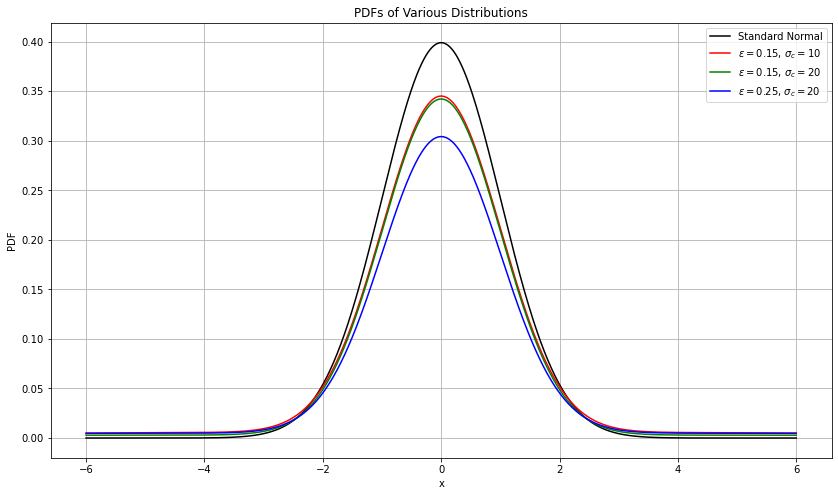

In [65]:
x = [i/100 for i in range(-600,601)]
ya = gauss(x,0,1)

w = -2
e = 0.15
sc = 10

yb = (gauss(x,0,1)*(1-e) + gauss(x,0,sc)*e )

w = -2
e = 0.15
sc = 20

yc = (gauss(x,0,1)*(1-e) + gauss(x,0,sc)*e )

w = -2
e = 0.25
sc = 20

yd = (gauss(x,0,1)*(1-e) + gauss(x,0,sc)*e )

plt.figure(figsize = (14,8))

plt.plot(x,ya,color='black')
plt.plot(x,yb,color='red')
plt.plot(x,yc,color='green')
plt.plot(x,yd,color='blue')

plt.grid()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDFs of Various Distributions')
plt.legend(['Standard Normal','$\epsilon = 0.15$, $\sigma_c = 10$','$\epsilon = 0.15$, $\sigma_c = 20$','$\epsilon = 0.25$, $\sigma_c = 20$'])

plt.show()

##### Exercise 3.4.27

In [66]:
def skewed_norm(x,a):
    aa = norm.pdf(x, loc=0, scale=1)
    ax = [a*l for l in x]
    b = norm.cdf(ax, loc=0, scale=1)
    y = [2*aa[i]*b[i] for i in range(len(x))]
    return y

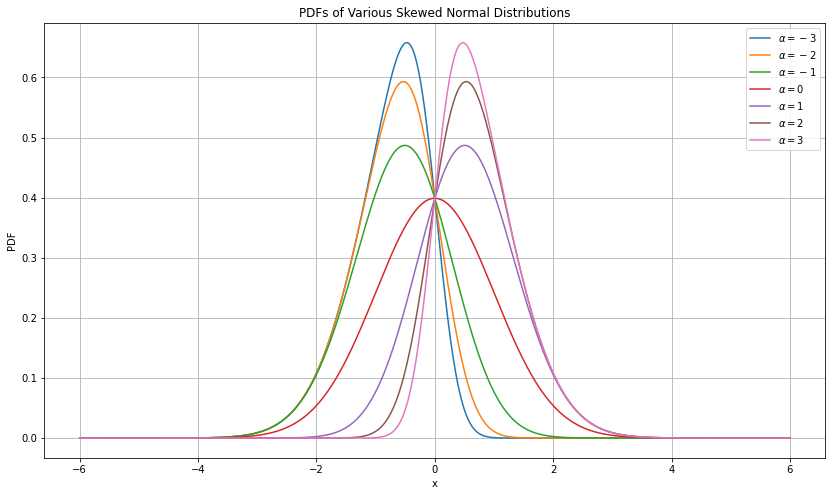

In [67]:
x = [i/100 for i in range(-600,601)]
plt.figure(figsize = (14,8))

alpha = [-3,-2,-1,0,1,2,3]

for a in alpha:
    plt.plot(x,skewed_norm(x,a))

plt.grid()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDFs of Various Skewed Normal Distributions')
plt.legend(['$\\alpha = -3$','$\\alpha = -2$','$\\alpha = -1$','$\\alpha = 0$','$\\alpha = 1$','$\\alpha = 2$','$\\alpha = 3$'])

plt.show()

##### Exercise 3.4.29

In [68]:
norm.cdf(-1.0/np.sqrt(2), loc=0, scale=1)

0.23975006109347674

In [69]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_erfc(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [70]:
x1 = np.random.normal(loc=6.0, scale=1.0, size=1000000)
x2 = np.random.normal(loc=7.0, scale=1.0, size=1000000)
np.mean(x1 > x2)

0.23963

##### Exercise 3.4.30

In [71]:
1-norm.cdf(7, loc=1, scale=6)

0.15865525393145707

##### Exercise 3.4.31

In [72]:
norm.cdf(40, loc=43, scale=3)

0.15865525393145707

##### Exercise 3.5.1

In [73]:
norm.cdf(124, loc=110, scale=10)-norm.cdf(106, loc=110, scale=10)

0.5746650823765531

In [74]:
mu = [2.8,110.0]
s1 = 0.4
s2 = 10.0
rho = 0.6

s11 = s1*s1
s12 = s1*s2*rho
s21 = s12
s22 = s2*s2

x = 3.2

muy_conditional = mu[1] + rho*s2/s1*(x-mu[0])
sigy_conditional = np.sqrt(s22*(1-rho*rho))

print(norm.cdf(124, loc=muy_conditional, scale=sigy_conditional)-norm.cdf(106, loc=muy_conditional, scale=sigy_conditional))

0.7356949724016876


In [75]:
sigy_conditional

8.0

##### Exercise 3.5.2

In [76]:
def cond_prob(y,x,s1,s2,mu,rho):
    s11 = s1*s1
    s12 = s1*s2*rho
    s21 = s12
    s22 = s2*s2

    cvrn = [[s11, s12],[s21, s22]]

    muc = mu[1] + rho*s2/s1*(x-mu[0])
    sigc = np.sqrt(s22*(1-rho*rho))
    
    return norm.cdf(y, loc=muc, scale=sigc)

In [77]:
# cond_prob(124,3.2,s1,s2,mu,rho)-cond_prob(106,3.2,s1,s2,mu,rho)
def prange(yh,yl,mu,sig):
    return (norm.cdf(yh, loc=mu, scale=sig)-norm.cdf(yl, loc=mu, scale=sig))
def prange_cond(yh,yl,x,s1,s2,mu,rho):
    return (cond_prob(yh,x,s1,s2,mu,rho)-cond_prob(yl,x,s1,s2,mu,rho))

In [78]:
mu = [3.0,1.0]
s1 = 4.0
s2 = 5.0
rho = 3.0/5.0
x = 7.0
y = -4.0

a = prange(8,3,mu[1],s2)
b = prange_cond(8,3,x,s1,s2,mu,rho)
c = prange(3,-3,mu[0],s1)
d = prange_cond(3,-3,y,s2,s1,list(reversed(mu)),rho)

print(a,b,c,d)

# norm.cdf(124, loc=110, scale=10)-norm.cdf(106, loc=110, scale=10)

0.26382159915590475 0.4400510717514666 0.4331927987311419 0.6430781304863229


In [79]:
list(reversed(mu))

[1.0, 3.0]

##### Exercise 3.5.5

<a list of 5 text.Text objects>

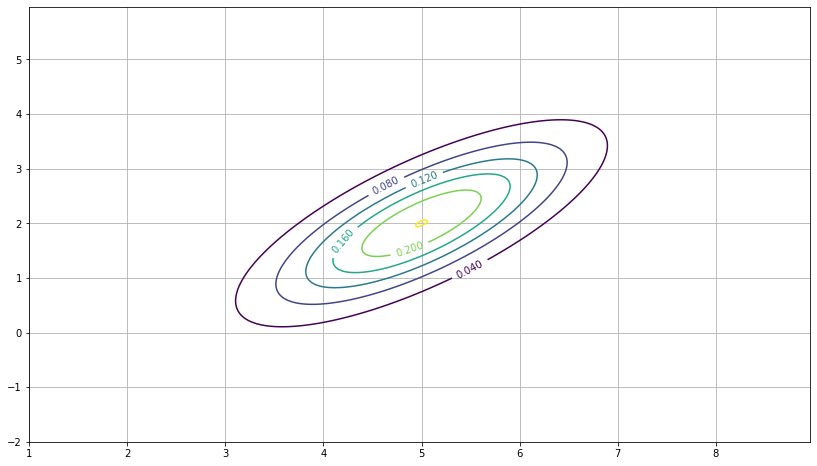

In [80]:
mu = [5,2]

s1 = 1
s2 = 1
rho =0.75

xl = mu[0]-4*s1
xh = mu[0]+4*s1

yl = mu[1]-4*s2
yh = mu[1]+4*s2

dx = (xh-xl)/200
dy = (yh-yl)/200

x, y = np.mgrid[xl:xh:dx, yl:yh:dy]
pos = np.dstack((x, y))

s11 = s1*s1
s12 = s1*s2*rho
s21 = s12
s22 = s2*s2

cvrn = [[s11, s12],[s21, s22]]

var = mnorm(mean=mu, cov=cvrn)

fxy = [i/100 for i in range(4,25,4)]

plt.figure(figsize = (14,8))
cs = plt.contour(x, y, var.pdf(pos),extend='both',levels = fxy)
plt.grid()
plt.clabel(cs, inline=1, fontsize=10)

In [81]:
# Example of a contour plot

# x = np.arange(0, 12)
# y = x.reshape(-1, 1)
# h = x * y

# plt.figure(figsize = (14,8))
# cs = plt.contour(h, levels=[4,9,16,25, 36, 49],
#     colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
# plt.grid()
# cs.cmap.set_over('red')
# cs.cmap.set_under('blue')
# cs.changed()

##### Exercise 3.5.7

In [82]:
mu = [5.0,10.0]
s1 = 1.0
s2 = 5.0
rho = 0.799
x = 5.0

print(prange_cond(16,4,x,s1,s2,mu,rho))

0.9540195873122455


##### Exercise 3.5.8

In [83]:
t = 2.632
xl = 40.8-t
xh = 40.8+t
norm.cdf(xh, loc=40.8, scale=1.6)-norm.cdf(xl, loc=40.8, scale=1.6)

0.900030188921757

In [84]:
print([xl,xh])

[38.168, 43.431999999999995]


##### Exercise 3.5.9

In [85]:
mu = [70.0,64.0]
s1 = 2.0
s2 = 1.5
rho = 0.7

s11 = s1*s1
s12 = s1*s2*rho
s21 = s12
s22 = s2*s2

x = 72

In [86]:
def cond_prob(y,x,s1,s2,mu,rho):
    s11 = s1*s1
    s12 = s1*s2*rho
    s21 = s12
    s22 = s2*s2

    cvrn = [[s11, s12],[s21, s22]]

    muc = mu[1] + rho*s2/s1*(x-mu[0])
    sigc = np.sqrt(s22*(1-rho*rho))
    
    return norm.cdf(y, loc=muc, scale=sigc)

In [87]:
def cond_expt(x,s1,s2,mu,rho):
    s11 = s1*s1
    s12 = s1*s2*rho
    s21 = s12
    s22 = s2*s2

    cvrn = [[s11, s12],[s21, s22]]

    muc = mu[1] + rho*s2/s1*(x-mu[0])
    sigc = np.sqrt(s22*(1-rho*rho))
    
    return muc,sigc

In [88]:
m,s = cond_expt(x,s1,s2,mu,rho)

In [89]:
norm.cdf(1.96, loc=0, scale=1.0) - norm.cdf(-1.96, loc=0, scale=1.0)

0.950004209703559

In [90]:
print(m-1.96*s,m+1.96*s)

62.950420042008396 67.14957995799159


In [91]:
print(m,s)

65.05 1.0712142642814275


##### Exercise 3.5.14

In [92]:
1- norm.cdf(2, loc=0, scale=np.sqrt(7))

0.2248458989844455

##### Exercise 3.5.17

In [93]:
a = 0.5
b = 2.0
y = 15.36
zl = -1*np.sqrt(15.36)
zh = np.sqrt(15.36)
print(1-gamma.cdf(y/4, a, loc=0, scale=b))
print(norm.cdf(zl, loc=0, scale=2)+1-norm.cdf(zh, loc=0, scale=2))
print('Note that we got the same answer above whether we used Chi-Squared or Normal Distribution')

0.05004352124870515
0.05004352124870515
Note that we got the same answer above whether we used Chi-Squared or Normal Distribution


##### Exercise 3.5.18

Show that 
#### $f_Y(y_1,y_2,y_3) = \frac{1}{(\sqrt(2\pi))^3} \exp(-y_1^2/2) \times \{\sin^2(y_2) - \cos^2(y_2)\} \times \sin(y_3)$
Since the pdf is the product of three separate functions of $y_1, y_2,$ and $y_3$, these variables are independent.
Note that evauation of the Jacobian is necessary, and is easy, as the inverse functions are already given in the problem statement.

##### Exercise 3.5.21

In [94]:
# (a)
sig = [[283, 215, 277, 208],[215,213,217,153],[277,217,336,236],[208,153,236,194]]
np.trace(sig)

1026

In [95]:
# (b)
ld, mld = np.linalg.eig(sig)
ld = ld.real
np.diag(ld)

array([[925.3636263 ,   0.        ,   0.        ,   0.        ],
       [  0.        ,  60.51933032,   0.        ,   0.        ],
       [  0.        ,   0.        ,  25.00226487,   0.        ],
       [  0.        ,   0.        ,   0.        ,  15.1147785 ]])

In [96]:
# Check if the decomposition is accurate
mldt = mld.T
np.dot(np.dot(mld,np.diag(ld)),mldt)/sig

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [97]:
# (c)
ld[0]/ld.sum()*100

90.19138657895236

In [98]:
# (d)
x = [np.sqrt(sig[i][i]) for i in range(4)]
x = np.array(x)
x/mldt[0]

array([31.39755811, 33.78098281, 31.41445363, 32.31293939])

##### Exercise 3.6.1

In [99]:
print(2*studt.cdf(-2.228,10))

0.05001177181711133


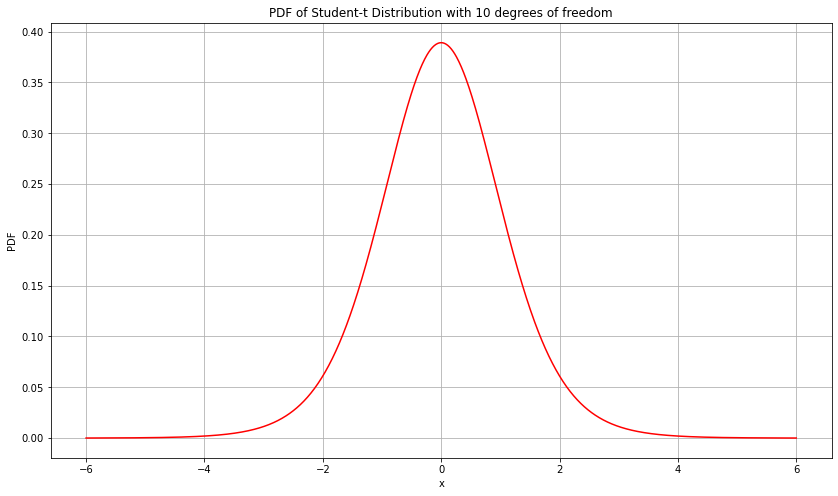

In [100]:
x = [i/100 for i in range(-600,601,1)]
y = studt.pdf(x,10)

plt.figure(figsize = (14,8))
plt.plot(x,y,'r')
plt.grid()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF of Student-t Distribution with 10 degrees of freedom')
plt.show()

##### Exercise 3.6.2

In [101]:
def dxt(a,df,t):
    return (studt.cdf(a, df, loc=0, scale=1)-t)
def invert_studt(t,df):
    a = 10.0 * int(np.sqrt(df/(df-2)))
    b = -10.0 * int(np.sqrt(df/(df-2)))
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxt(c,df,t)) > tol):
        c = (a+b)/2
        if(dxt(c,df,t) > 0):
            a = c
        else:
            b = c
    return c

In [102]:
invert_studt(0.95,14)

1.761322021484375

In [103]:
studt.cdf(0,14)

0.5

##### Exercise 3.6.4

In [104]:
x = [i/100 for i in range(-600,601,1)]
yn = norm.pdf(x,loc=0, scale=1)
yt1 = studt.pdf(x, 1, loc=0, scale=1)
yt3 = studt.pdf(x, 3, loc=0, scale=1)
yt10 = studt.pdf(x, 10, loc=0, scale=1)
yt30 = studt.pdf(x, 30, loc=0, scale=1)

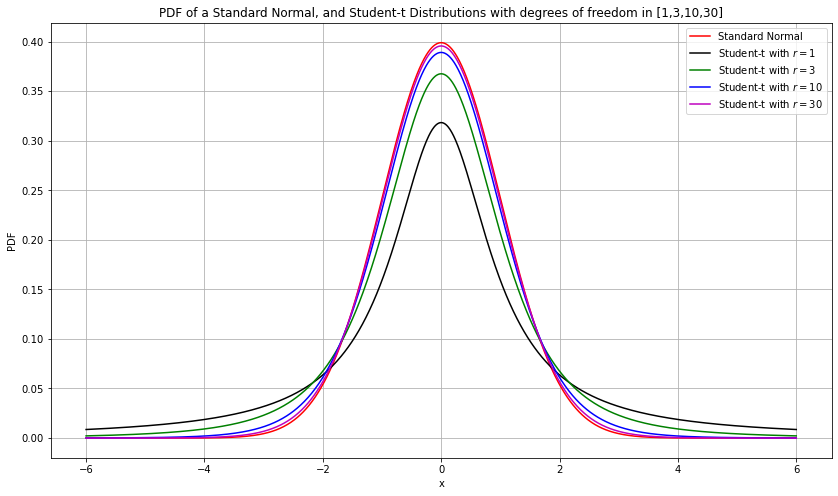

In [105]:
plt.figure(figsize = (14,8))
plt.plot(x,yn,'r')
plt.plot(x,yt1,'k')
plt.plot(x,yt3,'g')
plt.plot(x,yt10,'b')
plt.plot(x,yt30,'m')
plt.legend(['Standard Normal','Student-t with $r=1$','Student-t with $r=3$','Student-t with $r=10$','Student-t with $r=30$'])
plt.grid()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF of a Standard Normal, and Student-t Distributions with degrees of freedom in [1,3,10,30]')
plt.show()

##### Exercise 3.6.5

In [106]:
x = -2
yn = 2*norm.cdf(x,loc=0, scale=1)
yt1 = 2*studt.cdf(x, 1, loc=0, scale=1)
yt3 = 2*studt.cdf(x, 3, loc=0, scale=1)
yt10 = 2*studt.cdf(x, 10, loc=0, scale=1)
yt30 = 2*studt.cdf(x, 30, loc=0, scale=1)
print(yn,yt1,yt3,yt10,yt30)

0.04550026389635839 0.2951672353008664 0.1393259685588431 0.07338803477074039 0.0546250449629831


##### Exercise 3.6.6

In [107]:
x = -1*np.sqrt(3)
print(2*studt.cdf(x, 3, loc=0, scale=1))

0.18169011381620923


#### The probability density function for `f` is:

#### $f(x, df_1, df_2) = \frac{df_2^{df_2/2} df_1^{df_1/2} x^{df_1 / 2-1}}{(df_2+df_1 x)^{(df_1+df_2)/2}B(df_1/2, df_2/2)}$

#### for $x > 0$

##### Exercise 3.6.10

In [108]:
def dxf(a,dfn,dfd,t):
    return (fdist.cdf(a, dfn,dfd)-t)
def invert_fdist(t,d1,d2):
    var = 2*d2**2/(d2-2)**2/(d2-4)*(d1+d2-2)/d1
    sig = np.sqrt(var)
    mu = d2/(d2-2)
    a = int(mu+10.0) * int(sig)
    b = int(mu-10.0) * int(sig)
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxf(c,d1,d2,t)) > tol):
        c = (a+b)/2
        if(dxf(c,d1,d2,t) > 0):
            a = c
        else:
            b = c
    return c

In [109]:
a = invert_fdist(0.05,5,10)
b = invert_fdist(0.95,5,10)
print(a,b)

0.21117401123046875 3.325897216796875


##### Exercise 3.6.13

In [110]:
# (b)
def lpdf(y,s):
    e = np.exp(1)
    return e**y / (1+(e**y)/s)**(1+s)
def lcdf(y,s):
    e = np.exp(1)
    return 1 - 1 / (1+(e**y)/s)**s

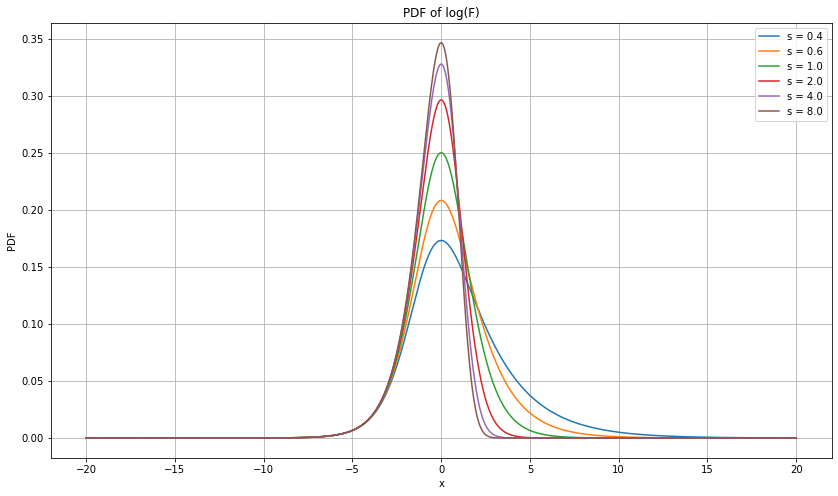

In [111]:
x = [i/100 for i in range(-2000,2001)]
l = []
plt.figure(figsize = (14,8))
for s in [0.4,0.6,1.0,2.0,4.0,8.0]:
    p = lpdf(x,s)
    plt.plot(x,p)
    l.append('s = '+str(s))
plt.grid()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF of log(F)')
plt.legend(l)
plt.show()

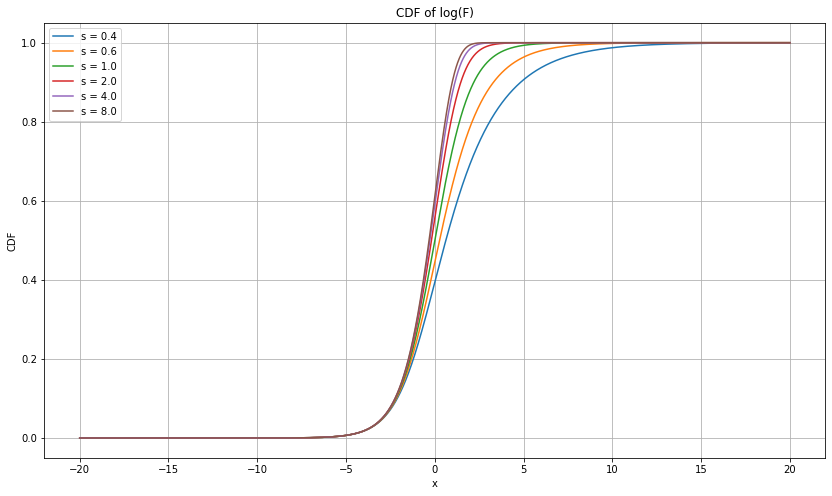

In [112]:
plt.figure(figsize = (14,8))
for s in [0.4,0.6,1.0,2.0,4.0,8.0]:
    c = lcdf(x,s)
    plt.plot(x,c)
plt.grid()
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('CDF of log(F)')
plt.legend(l)
plt.show()

##### Exercise 3.7.2

In [113]:
def loggamma_pdf(x,a,b):
    y1 = x[np.where(x<1.0)] * 0.0
    x2 = x[np.where(x>=1.0)]
    y2 = gamma.pdf(np.log(x2), a, loc=0, scale=b)/x2
    return np.hstack([y1,y2])
def loggamma_cdf(x,a,b):
    pdf = loggamma_pdf(x,a,b)
    delta = np.mean(np.diff(x))
    return pdf.cumsum()*delta

In [114]:
a = 2.0
b = 2.0
x = np.arange(0.0,600.0,0.01)
y = loggamma_cdf(x, a, b)

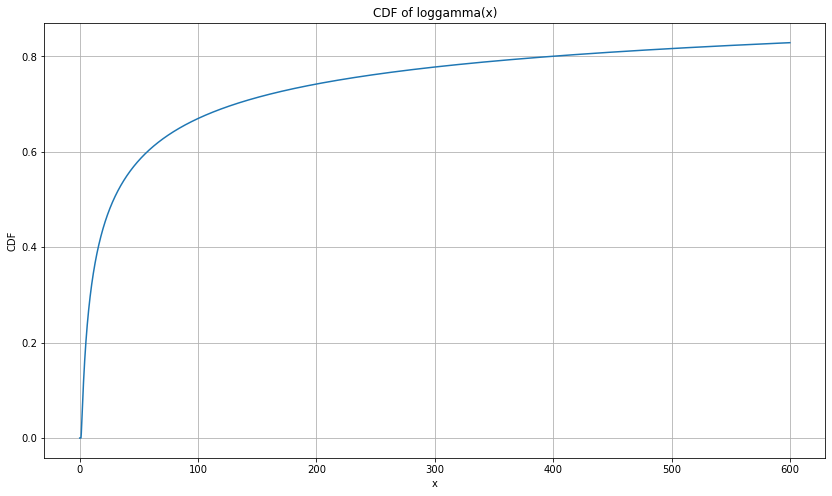

In [115]:
plt.figure(figsize = (14,8))
plt.plot(x,y)
plt.grid()
plt.xlabel('x')
# plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('CDF')
plt.title('CDF of loggamma(x)')
plt.show()

In [116]:
y[-1]

0.8285957638119824

##### Exercise 3.7.4

In [117]:
def mixed_pdf(x,a,b,p):
    p1 = p*loggamma_pdf(x,a,b)
    p2 = (1-p)*gamma.pdf(x, a, loc=0, scale=b)
    return (p1+p2)

In [118]:
a = 2.0
b = 2.0
x = np.arange(0.0,20.0,0.01)

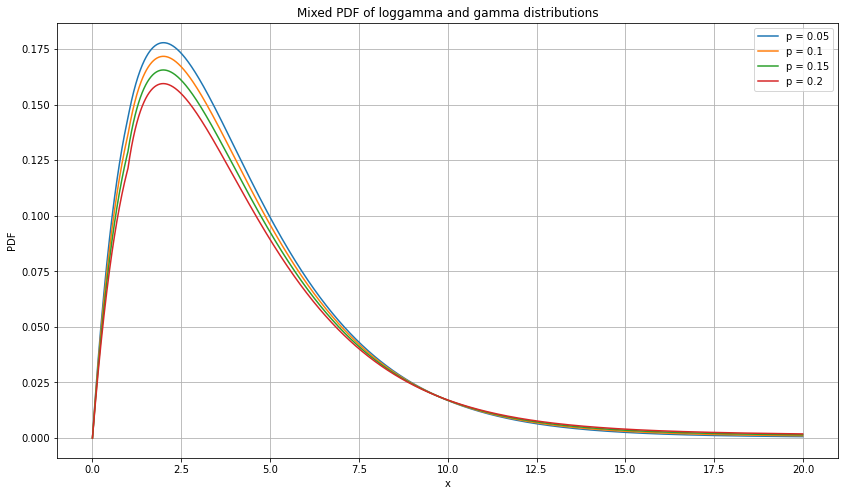

In [119]:
plt.figure(figsize = (14,8))
l = []
for p in [0.05,0.1,0.15,0.2]:
    plt.plot(x,mixed_pdf(x,a,b,p))
    l.append('p = '+str(p))
plt.grid()
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend(l)
plt.title('Mixed PDF of loggamma and gamma distributions')
plt.show()

##### Exercise 3.7.5

Mixture distribution is not same as summing the random variables. Had we taken $Y = pZ_1+(1-p)Z_2$, where $Z_1$ and $Z_2$ are normally distributed random variable with $Z_1$ being $N(0,1)$ and $Z_2$ being $N(0,3)$, then we'd get the CDF of the sum as a convolution of the individual PDFs, which we know to be another normally distributed random variable. 

Here, we are simply summing the individual CDFs with some weights, and since the resulting sum satisfies the properties of a CDF, we are trying to investigate the properties of that random variable whose CDF is the weighted sum of the individual CDFs of these normal random variables $Z_1$ and $Z_2$.
In this problem, the random variable whose CDF is the weighted sum of that of $Z_1$ and $Z_2$, is denoted by $Z$. Then the $E(Z^2) = p\times E(Z_1^2)+(1-p)\times E(Z_2^2)$. Also, $E(Z^4) = p\times E(Z_1^4)+(1-p)\times E(Z_2^4)$.

Hence $E(Z^2) = 9/5$, and $E(Z^4) = 3\times p + 3^4\times (1-p) \times 3$. Finally, Kurtosis is $E(Z^4)/[E(Z^2)]^2$.

In [120]:
p=0.9
q = 3*p + 3**5*(1-p)
r = q/(9/5)**2

In [121]:
print('The desired answer is {:.2f}'.format(r))
print('The desired answer is', round(r,2))

The desired answer is 8.33
The desired answer is 8.33
